# Filtracja bilateralna

## Konwolucja obrazu z filtrem o zadanych współczynnikach

Splot (konwolucję) obrazu wejściowego $I$ z filtrem $\psi$ dla ustalonego punktu obrazu $\mathbf{x}$ można przedstawić następująco:

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||)I(\mathbf{p})
\end{equation}

gdzie:
- $\hat{I}$ jest obrazem wynikowym (przefiltrowanym),
- $W_N = \sum_y \psi(y)$ jest parametrem normalizującym współczynniki filtra $\psi$,
- $||\cdot||$ jest odległością między punktami obrazu $\mathbf{x}$ i $\mathbf{p}$ według ustalonej metryki (np. norma $L_2$). Uwaga, proszę pamiętać, że zarówno $\mathbf{x}$, jak i $\mathbf{p}$ to współrzędne przestrzenne,
- $\eta(\mathbf{x})$ jest otoczeniem punktu $\mathbf{x}$.

Funkcja $\psi$ decyduje o charakterze filtracji. Dla filtru Gaussowskiego:

\begin{equation}
\psi(y) = G_{\delta_s}(y)
\end{equation}

gdzie: $G_{\delta_s}(y)$ jest funkcją Gaussa z parametrem skali $\delta_s$.

Opisaną powyżej filtrację realizowaliśmy w ramach ćwiczenia "Przetwarzanie wstępne. Filtracja kontekstowa."

## Filtracja bilateralna

Wadą klasycznego splotu jest brak adaptacji współczynników filtra do lokalnego otoczenia $\eta(\mathbf{x})$ filtrowanego punktu $\mathbf{x}$.
Oznacza to wykorzystanie tych samych współczynników filtra $\psi$ niezależnie od tego czy otoczenie jest względnie jednorodne lub zawiera krawędzie obiektów (w tym przypadku dochodzi do "rozmywania" krawędzi).
Filtracja bilateralna uwzględnia lokalne otoczenie filtrowanego punktu, w ten sposób, że parametry filtra zmieniają się w zależności od "wyglądu" otocznia.


Współczynniki filtra obliczane są na podstawie odległości filtrowanego punktu $\mathbf{x}$ od każdego punktu otoczenia $\mathbf{p}$ w dziedzinie przestrzennej obrazu (tak jak przy typowym filtrze np. Gaussa) oraz odległości punktów w przeciwdziedzinie obrazu (np. na podstawie różnicy w jasności pikseli dla obrazu w odcieniach szarości):

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||) \gamma(|I(\mathbf{p}) - I(\mathbf{x})|) I(\mathbf{p})
\end{equation}
gdzie:
- $W_N$ jest współczynnikiem normalizującym filtr,
- $\gamma$ jest funkcją odległości w przeciwdziedzinie obrazu, np. $\gamma(y)=\exp(-\frac{y^2}{2\delta_r^2})$
- parametr $\delta_r$ jest utożsamiany z poziomem szumu w obrazie i należy go dobrać w sposób empiryczny.

Proszę chwilę zastanowić się nad powyższym równaniem, w szczególności nad funkcją $\gamma$. Proszę wyznaczyć, jaka będzie wartość funkcji dla pikseli podobnych (różnica 0, 1, 2), a skrajnie różnych (255, 200).

##  Realizacja ćwiczenia

### Wczytanie danych

1. Wczytaj dane z pliku *MR_data.mat*. W tym celu wykorzystaj funkcję `loadmat` z pakietu scipy:
        from scipy.io import loadmat
        mat = loadmat('MR_data.mat')

2. Wczytany plik zawiera 5 obrazów: *I_noisefree*, *I_noisy1*, *I_noisy2*, *I_noisy3* oraz *I_noisy4*. Odczytać je można w następujący sposób:
        Input = mat['I_noisy1']

3.Wyświetl wybrany obraz z pliku *MR_data.mat*. Zagadka - co to za obrazowanie medyczne?

In [42]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat
import math
import os

if not os.path.exists("MR_data.mat") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/MR_data.mat --no-check-certificate
mat = loadmat('MR_data.mat')

#TODO Samodzielna
I_noisefree = mat['I_noisefree']
I_noisy1 = mat['I_noisy1']
I_noisy2 = mat['I_noisy2']
I_noisy3 = mat['I_noisy3']
I_noisy4 = mat['I_noisy4']
I_noisefree_copy = mat['I_noisefree'].copy()
I_noisy1_copy = mat['I_noisy1'].copy()
I_noisy2_copy = mat['I_noisy2'].copy()
I_noisy3_copy = mat['I_noisy3'].copy()
I_noisy4_copy = mat['I_noisy4'].copy()
plt.figure(figsize=(20,20))
plt.imshow(I_noisy4)

images = [I_noisefree, I_noisy1, I_noisy2, I_noisy3, I_noisy4]
images_copy = [I_noisefree_copy, I_noisy1_copy, I_noisy2_copy, I_noisy3_copy, I_noisy4_copy]
"""
może to USG
"""

'\nmoże to USG\n'

Error in callback <function flush_figures at 0x000001F4F49875E0> (for post_execute):


KeyboardInterrupt: 

### "Klasyczna" konwolucja

1. Zdefiniuj parametry filtra Gaussowskiego: rozmiar okna i wariancję $\delta_S$.
2. Oblicz współczynniki filtra na podstawie zdefiniowanych parametrów (najprościej w ramach podwójnej pętli for).
2. Sprawdź ich poprawność i zwizualizuj filtr (tak jak w ćwiczeniu pt. "Przetwarzanie wstępne. Filtracja kontekstowa.").
3. Wykonaj kopię obrazu wejściowego: `IConv = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentem tej funkcji są aktualnie przetwarzane okno i współczynniki filtra.
7. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
8. Wyświetl wynik filtracji.
9. Porównaj wynik z obrazem oryginalnym.

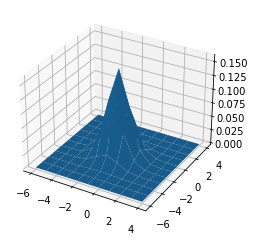

KeyboardInterrupt: 

In [43]:
#TODO Samodzielna
# 1
win_size = 11
half = int( win_size / 2)
wariance = 1
# 2
coef_matr = np.zeros((win_size,win_size))

for x in range(win_size):
    for y in range(win_size):
        x_real = x - half
        y_real = y - half
        coef_matr[x,y] = 1/ (2 * np.pi * wariance**2) * np.exp(- (x_real**2+y_real**2) / (2 * wariance ** 2))
# 3
coef_matr = coef_matr/np.sum(coef_matr)

def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')


    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun

    ax.plot_surface(X, Y, Z)

    plt.show()
# 7
mesh(coef_matr,win_size)
def calc(window, filter):
    return int(np.sum(window * filter))

for image, image_copy in zip(images,images_copy):
# 5
    x_size,y_size = image.shape
    half_plus = half + 1
    for x in range(half,x_size - half_plus):
        for y in range(half,y_size - half_plus):
            min_x = x - half
            max_x = x + half_plus
            min_y = y - half
            max_y = y + half_plus
            # 6
            contekst = image[min_x:max_x, min_y:max_y]
            image_copy[x,y] = calc(contekst,coef_matr)
    fig, ax = plt.subplots(1,2,figsize=(20,20))
    ax[0].imshow(I_noisy1_copy)
    ax[1].imshow(I_noisy1)

### Filtracja bilateraln
a

1. Zdefiniuj dodatkowy parametr: wariancję $\delta_R$.
3. Wykonaj kopię obrazu wejściowego: `IBilateral = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentami funkcji są aktualnie przetwarzane okno, współczynniki filtra gausowskiego (takie same jak wcześniej) i wariancja $\delta_R$.
7. Oblicz odległość w przeciwdziedzinie (dla wartości pikseli).
8. Oblicz funkcję Gaussa dla obliczonych odległości z zadanym parametrem.
9. Wykonaj normalizację obliczonych współczynników.
10. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
11. Wyświetl wynik filtracji.
12. Porównaj wynik z obrazem oryginalnym.

In [ ]:
win_size = 5
half = int( win_size / 2)
wariance = 0.8
wariance_r = 0.4
for wariance_r in range(100,1000,100):

    fi = lambda x, wr: np.exp(-x**2/(2*wr**2))

    coef_matr = np.zeros((win_size,win_size))
    for x in range(win_size):
        for y in range(win_size):
            x_real = x - half
            y_real = y - half
            coef_matr[x,y] = 1/ (2 * np.pi * wariance**2) * np.exp(- (x_real**2+y_real**2) / (2 * wariance ** 2))
    coef_matr /= np.sum(coef_matr)

    def calc2(window, win_size, coef_matr, wariance_r):
        bineral_mask = np.zeros(window.shape)
        sr = int(win_size/2)+1
        el_sr = window[sr,sr]
        for x, row in enumerate(window):
            for y, el in enumerate(row):
                bineral_mask[x,y] = fi(abs(el-el_sr), wariance_r)
        bineral_mask /= np.sum(bineral_mask)
        filtr = np.sum(coef_matr * bineral_mask * window)
        return filtr



    I_noisefree_copy = mat['I_noisefree'].copy()
    I_noisy1_copy = mat['I_noisy1'].copy()
    I_noisy2_copy = mat['I_noisy2'].copy()
    I_noisy3_copy = mat['I_noisy3'].copy()
    I_noisy4_copy = mat['I_noisy4'].copy()
    images = [I_noisefree]#, I_noisy1, I_noisy2, I_noisy3, I_noisy4]
    images_copy = [I_noisefree_copy]#, I_noisy1_copy, I_noisy2_copy, I_noisy3_copy, I_noisy4_copy]

    for image, image_copy in zip(images,images_copy):
        x_size,y_size = image.shape
        half_plus = half + 1
        for x in range(half,x_size - half_plus):
            for y in range(half,y_size - half_plus):
                min_x = x - half
                max_x = x + half_plus
                min_y = y - half
                max_y = y + half_plus
                # 6
                contekst = image[min_x:max_x, min_y:max_y]
                image_copy[x,y] = calc2(contekst,win_size,coef_matr,wariance_r)

        fig, ax = plt.subplots(1,2,figsize=(20,20))
        ax[0].imshow(image_copy)
        ax[1].imshow(image)


